In [191]:
import numpy

In [192]:
import pandas

In [193]:
import tensorflow

In [194]:
import sklearn

In [195]:
import keras

In [196]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
dataframe = pandas.read_csv("./eon_data.csv", usecols=[4], engine='python')
print(dataframe)

          Close
0     21.370001
1     21.320000
2     21.110001
3     20.459999
4     21.730000
5     21.760000
6     22.309999
7     22.160000
8     21.840000
9     21.900000
10    21.760000
11    21.840000
12    22.080000
13    22.660000
14    22.490000
15    22.389999
16    22.600000
17    22.870001
18    22.320000
19    22.530001
20    22.770000
21    22.799999
22    22.730000
23    22.570000
24    22.860001
25    23.160000
26    23.200001
27    23.690001
28    24.350000
29    24.129999
...         ...
1228   9.930000
1229  10.030000
1230  10.120000
1231  10.140000
1232  10.100000
1233   9.980000
1234  10.000000
1235   9.710000
1236   9.720000
1237   9.480000
1238   9.400000
1239   9.380000
1240   9.320000
1241   9.170000
1242   9.360000
1243   9.580000
1244   9.600000
1245   9.800000
1246   9.780000
1247   9.840000
1248   9.800000
1249   9.800000
1250   9.890000
1251   9.810000
1252   9.750000
1253   9.750000
1254   9.670000
1255   9.820000
1256   9.830000
1257   9.740000

[1258 r

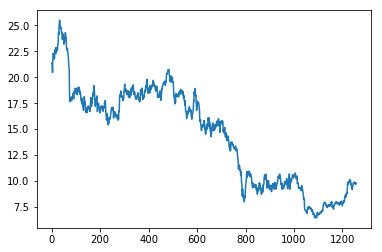

In [199]:
plt.plot(dataframe)
plt.show()

In [200]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataframe = scaler.fit_transform(dataframe)
print(dataframe)

[[ 0.78342952]
 [ 0.78080755]
 [ 0.76979554]
 ..., 
 [ 0.17776612]
 [ 0.17829051]
 [ 0.17357105]]


In [201]:
numpy.random.seed(7)

In [202]:
# split into train and test sets
train_size = int(len(dataframe) * 0.67)
test_size = len(dataframe) - train_size
train, test = dataframe[0:train_size,:], dataframe[train_size:len(dataset),:]
print(len(train), len(test))

842 416


In [203]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# convert an array of values into a dataset matrix

In [204]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [205]:
print(scaler.inverse_transform(trainY))

[ 21.32      21.110001  20.459999  21.73      21.76      22.309999  22.16
  21.84      21.9       21.76      21.84      22.08      22.66      22.49
  22.389999  22.6       22.870001  22.32      22.530001  22.77      22.799999
  22.73      22.57      22.860001  23.16      23.200001  23.690001  24.35
  24.129999  24.9       25.110001  25.5       25.379999  25.120001  24.76
  24.879999  24.709999  24.76      24.5       24.370001  24.219999  24.35
  23.709999  23.639999  24.        24.059999  24.16      23.99      23.77
  23.200001  23.200001  23.4       23.450001  23.629999  24.07      24.299999
  24.1       23.9       23.860001  23.35      22.75      22.629999
  22.799999  22.719999  22.74      22.389999  22.209999  22.120001  21.58
  21.15      20.9       20.700001  18.629999  17.9       17.84      17.639999
  18.02      18.        17.93      18.07      18.01      17.75      17.969999
  18.120001  18.040001  18.01      18.15      18.440001  18.200001
  17.959999  17.92      18.4       1

C:\Users\Georg\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [206]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [207]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
2s - loss: 0.0505
Epoch 2/100
1s - loss: 0.0066
Epoch 3/100
1s - loss: 0.0020
Epoch 4/100
1s - loss: 4.1417e-04
Epoch 5/100
1s - loss: 2.7765e-04
Epoch 6/100
1s - loss: 2.7384e-04
Epoch 7/100
1s - loss: 2.6573e-04
Epoch 8/100
1s - loss: 2.7494e-04
Epoch 9/100
1s - loss: 2.6429e-04
Epoch 10/100
1s - loss: 2.6619e-04
Epoch 11/100
1s - loss: 2.6267e-04
Epoch 12/100
1s - loss: 2.6726e-04
Epoch 13/100
1s - loss: 2.6358e-04
Epoch 14/100
1s - loss: 2.7047e-04
Epoch 15/100
1s - loss: 2.6713e-04
Epoch 16/100
1s - loss: 2.6573e-04
Epoch 17/100
1s - loss: 2.6466e-04
Epoch 18/100
1s - loss: 2.6731e-04
Epoch 19/100
1s - loss: 2.6394e-04
Epoch 20/100
1s - loss: 2.5792e-04
Epoch 21/100
1s - loss: 2.7370e-04
Epoch 22/100
1s - loss: 2.5829e-04
Epoch 23/100
1s - loss: 2.5955e-04
Epoch 24/100
1s - loss: 2.6239e-04
Epoch 25/100
1s - loss: 2.6665e-04
Epoch 26/100
1s - loss: 2.5886e-04
Epoch 27/100
1s - loss: 2.6678e-04
Epoch 28/100
1s - loss: 2.6094e-04
Epoch 29/100
1s - loss: 2.5747e-04
Epoch 

In [208]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions


In [210]:
numpy.reshape(trainPredict, (trainPredict.shape[0], 1, trainPredict.shape[1]))
numpy.reshape(testPredict, (testPredict.shape[0], 1, testPredict.shape[1]))

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.30 RMSE
Test Score: 0.23 RMSE


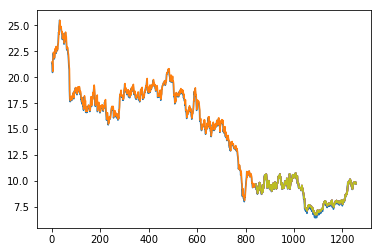

In [211]:


# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataframe)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataframe))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()